In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Set the path to your dataset
dataset_path = '/content/drive/MyDrive/dataset'

In [ ]:
# Image size (you can change if needed)
img_width, img_height = 128, 128

# Batch size
batch_size = 32

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values (0-1)
    validation_split=0.2         # 20% for validation
)


In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,          # 20% for validation
    subset="training",
    seed=123,                      # Important: set a seed to shuffle reproducibly!
    shuffle=True,                  # <-- shuffle enabled
    image_size=(128, 128),
    batch_size=32,
    label_mode='categorical'  # Add this line to one-hot encode labels
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,                      # same seed
    shuffle=True,                  # <-- shuffle enabled
    image_size=(128, 128),
    batch_size=32,
    label_mode='categorical'  # Add this line to one-hot encode labels
)

Found 957 files belonging to 7 classes.
Using 766 files for training.
Found 957 files belonging to 7 classes.
Using 191 files for validation.


In [ ]:
# Get number of classes
num_classes = len(train_dataset.class_names)

In [ ]:
# Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Print model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,288,583 (16.36 MB)

 Trainable params: 4,288,583 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_dataset, # Use train_dataset directly
    epochs=50,
    validation_data=val_dataset  # Use val_dataset directlya
)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 167s 7s/step - accuracy: 0.1950 - loss: 92.9947 - val_accuracy: 0.2984 - val_loss: 1.8637
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 44s 325ms/step - accuracy: 0.2840 - loss: 1.8755 - val_accuracy: 0.4241 - val_loss: 1.6739
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 345ms/step - accuracy: 0.3106 - loss: 1.7901 - val_accuracy: 0.4712 - val_loss: 1.4808
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 418ms/step - accuracy: 0.3758 - loss: 1.6559 - val_accuracy: 0.4921 - val_loss: 1.4182
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 355ms/step - accuracy: 0.4174 - loss: 1.4287 - val_accuracy: 0.4817 - val_loss: 1.4208
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 341ms/step - accuracy: 0.4646 - loss: 1.4202 - val_accuracy: 0.5340 - val_loss: 1.4569
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 325ms/step - accuracy: 0.4594 - loss: 1.3628 - val_accuracy: 0.5445 - val_loss: 1.3851
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 411ms/step - accuracy: 0.5752 - loss: 1.1329 - val_accurac

In [ ]:
# Save the trained model (optional)
model.save('mineral_classifier_cnn.h5')


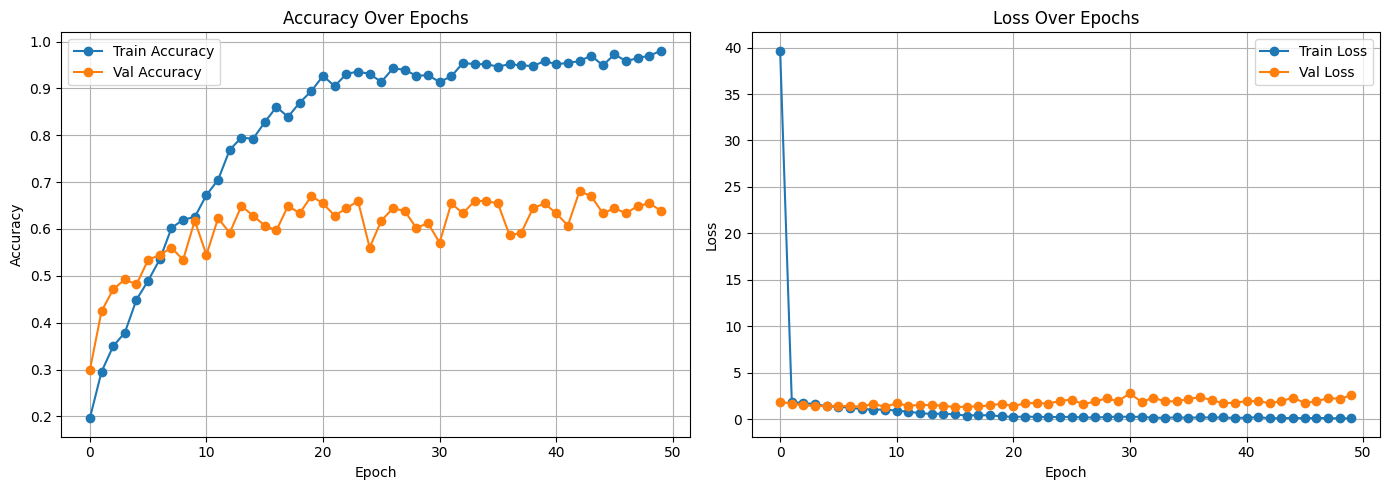

In [ ]:

# Plot training & validation accuracy and loss
plt.figure(figsize=(14,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model('mineral_classifier_cnn.h5')

# Class names (must be in the same order as your dataset folders!)
class_names = ['biotite', 'bornite', 'chrysocolla', 'malachite', 'muscovite', 'pyrite', 'quartz']

# Load your new rock image
img_path = '/content/quartize.jpg'   # <-- put your image path here
img = image.load_img(img_path, target_size=(128, 128))  # Same size as training

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize same as training

# Predict
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
predicted_class_name = class_names[predicted_class_index]

# Output
print(f"Predicted Mineral: {predicted_class_name}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/quartize.jpg'